In [18]:
#Section 1: Data Acquisition from Kaggle 

STEP 1: Authenticate Kaggle API

In [19]:
import os
from kaggle.api.kaggle_api_extended import KaggleApi

os.environ['KAGGLE_USERNAME'] = 'hsvjayarathne'
os.environ['KAGGLE_KEY'] = '513f6c355142a3b5930d872238694324'

api = KaggleApi()
api.authenticate()
print("Kaggle API authenticated!")


Kaggle API authenticated!


STEP 2: Download and unzip the dataset

In [20]:
dataset = 'fedesoriano/heart-failure-prediction'
api.dataset_download_files(dataset, path='data', unzip=True)

Dataset URL: https://www.kaggle.com/datasets/fedesoriano/heart-failure-prediction


STEP 3: Load dataset

In [21]:
import pandas as pd
df = pd.read_csv('heart.csv')
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


Section 2: Exploratory Data Analysis 

(918, 12)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB
None
              Age   RestingBP  Cholesterol   FastingBS       MaxHR  \
count  918.000000  918.000000   918.000000  918.000000  918.000000   
mean    53.510893  132.396514   198.799564    0

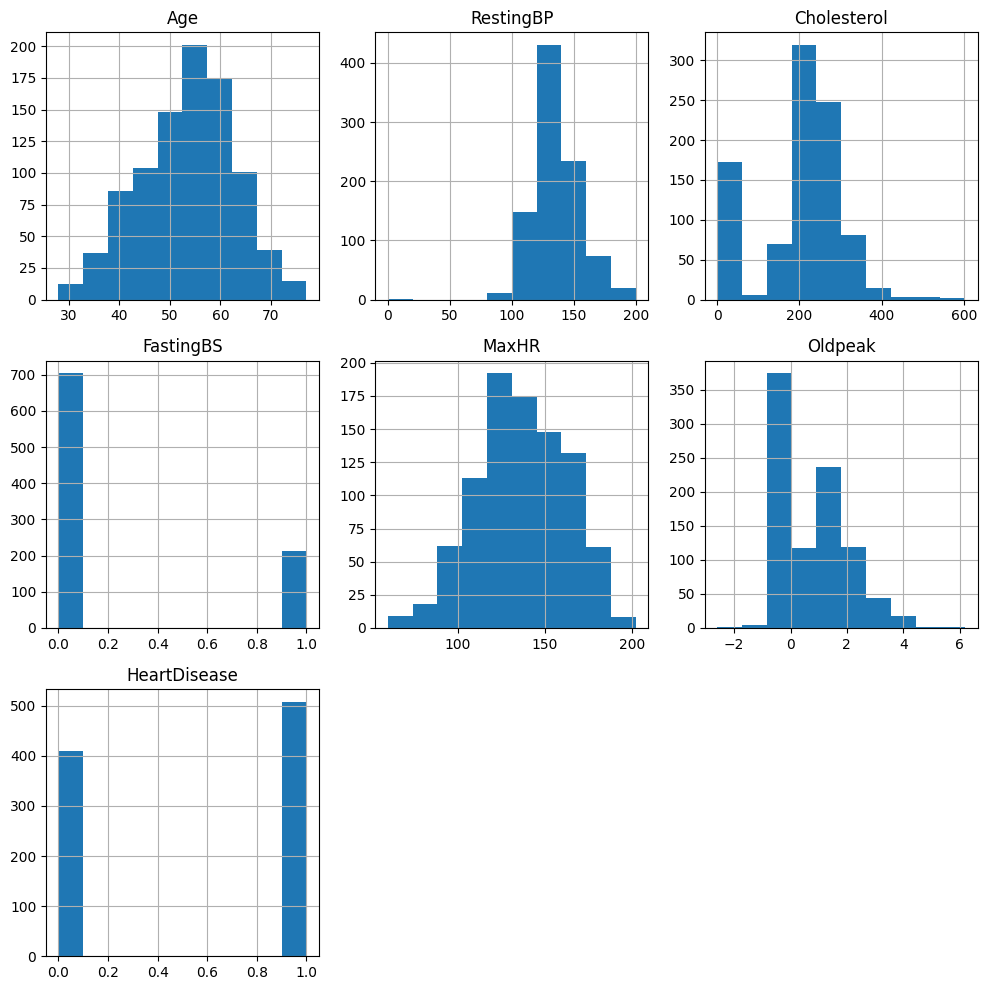

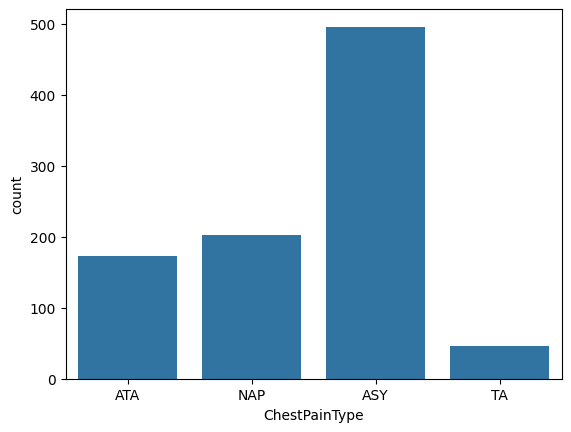

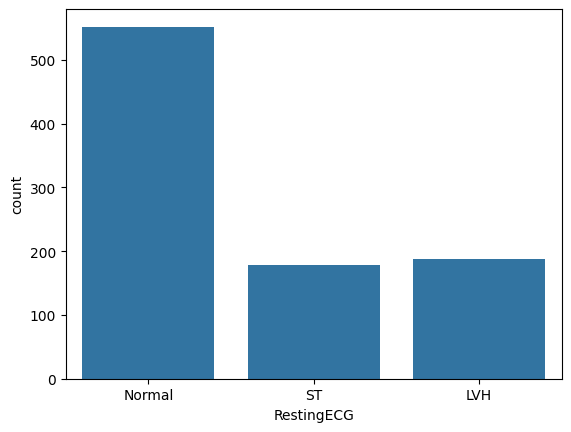

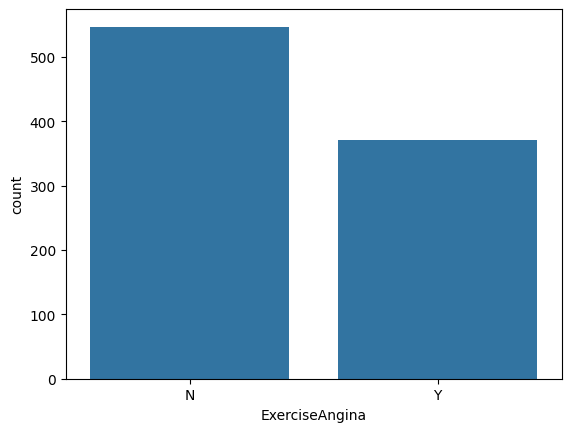

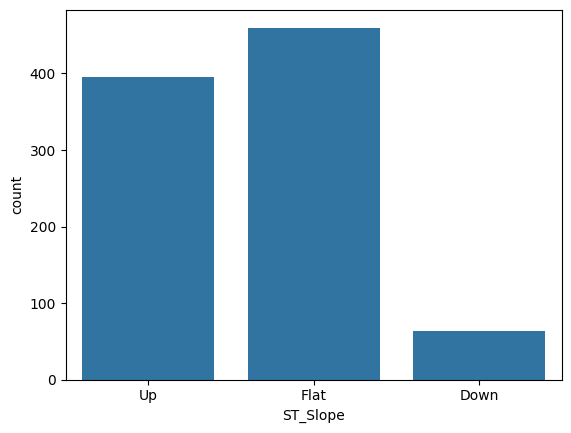

<Axes: >

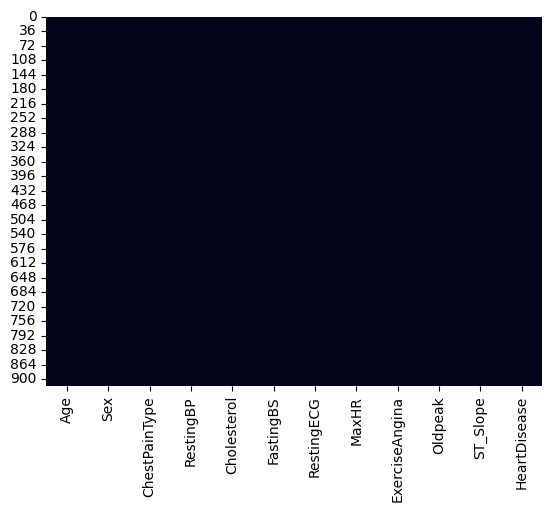

In [22]:
# Basic info
print(df.shape)
print(df.info())
print(df.describe())

# Visualizations
import seaborn as sns
import matplotlib.pyplot as plt

# Histograms
df.hist(figsize=(10, 10)); plt.tight_layout()

# Boxplots
sns.boxplot(data=df)

# Countplots for categorical variables
categorical = ['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope']
for col in categorical:
    sns.countplot(x=col, data=df)
    plt.show()

# Missing values heatmap
sns.heatmap(df.isnull(), cbar=False)

Section 3: Data Preprocessing 

In [23]:
# Handle missing values (if any)
df = df.dropna()  # or use df.fillna(method='ffill')

# Encoding
df_encoded = pd.get_dummies(df, drop_first=True)

# Scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
numerical = ['Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak']
df_encoded[numerical] = scaler.fit_transform(df_encoded[numerical])

# Split data
from sklearn.model_selection import train_test_split
X = df_encoded.drop('HeartDisease', axis=1)
y = df_encoded['HeartDisease']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Section 4: Model Development

In [24]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.model_selection import cross_val_score

# Logistic Regression
lr = LogisticRegression()
lr.fit(X_train, y_train)
lr_pred = lr.predict(X_test)
print("LR Accuracy:", accuracy_score(y_test, lr_pred))

# Random Forest
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
rf_pred = rf.predict(X_test)
print("RF Accuracy:", accuracy_score(y_test, rf_pred))

# Cross-validation
cv_score = cross_val_score(rf, X, y, cv=5)
print("RF CV Score:", cv_score.mean())


LR Accuracy: 0.8532608695652174
RF Accuracy: 0.8695652173913043
RF CV Score: 0.8256296032311713


Section 5: Model Export and Submission 

In [25]:
import joblib
joblib.dump(rf, 'heart_rf_model.pkl')


['heart_rf_model.pkl']